In [1]:
import fitz  # this is pymupdf
import os
import matplotlib.pyplot as plt

from wordcloud import WordCloud


In [2]:
text = ""
my_path = '../biblio/TCD/files'
for path in os.listdir(os.path.join(my_path)):
    arquivo = os.listdir(os.path.join(my_path, path))[0]
    print(arquivo)
    with fitz.open(os.path.join(my_path, path, arquivo)) as doc:
        for page in doc:
            text += page.getText()


9. SBRAGIA, et al (2021) - The role of stakeholder management on project results (v2).pdf
10. ESKEROD_VAAGAASAR_2014 (PMJ) Stakeholder management strategies and practices during a project course.pdf
Shenhar et al. - 1997 - Mapping the Dimensions of Project Success..pdf
Anbari et al. - 2008 - PERSPECTIVES ON RESEARCH IN PROJECT MANAGEMENT..pdf
Silvius - 2017 - Sustainability as a new school of thought in proje.pdf
Gilbert Silvius et al. - 2017 - Considering sustainability in project management d.pdf
Turner et al. - 2013 - Perspectives on research in project management th.pdf
Vos e Achterkamp - 2006 - Stakeholder identification in innovation projects.pdf
El-Gohary et al. - 2006 - Stakeholder management for public private partners.pdf
Achterkamp e Vos - 2008 - Investigating the use of the stakeholder notion in.pdf
Shaukat et al. - 2021 - Revisiting the relationship between sustainable pr.pdf
Elias et al. - 2002 - Stakeholder analysis for R&D project management.pdf
Silvius e Schipper - 201

In [3]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['et al', 'project', 'management', 'et', 'al', 'success', 'projects', 'stakeholder',
                  'research', 'article', 'journal', 'stakeholders', 'sustainability', 
                   'manager', 'organization', 'international', 'managers', 'stake','holder',
                   'sustainable', 'development', 'also', 'factor', 'could', 'however',
                  'factors', 'paper'])
wc = WordCloud(stopwords=stop_words, min_word_length=3).generate(text.lower())

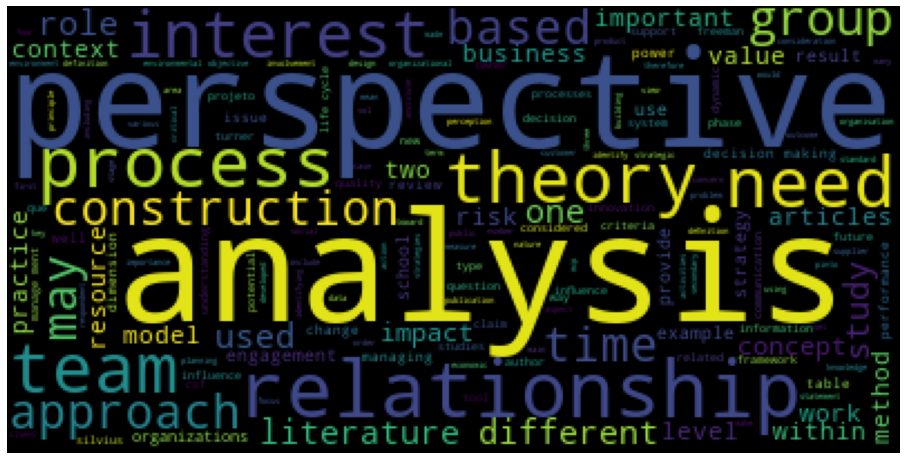

In [4]:
plt.figure(figsize=(16,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [5]:
# !pip install spacy
import spacy
# nlp = spacy.load('en_core_web_sm')
# nlp.max_length = 1640226
# doc = nlp(text.lower())

In [19]:
import pickle
with open('nlp.pickle', 'wb') as out:
    pickle.dump(nlp, out)
with open('doc.pickle', 'wb') as out:
    pickle.dump(doc, out)


In [20]:
with open('nlp.pickle', 'rb') as in_:
    nlp = pickle.load(in_)
with open('doc.pickle', 'rb') as in_:
    doc = pickle.load(in_)


In [21]:
from collections import defaultdict
text_pos_ = defaultdict(list)
text_lemma = []
for token in doc:
    # print(token.text, token.pos_)
    if token.pos_ == 'ADJ':
        text_pos_['ADJ'].append(token.text)
    elif token.pos_ == 'VERB':
        text_pos_['VERB'].append(token.text)
    else:
        text_pos_['OTHER'].append(token.text)
    text_lemma.append(token.lemma_)
    


In [22]:
def plot_wc(wc):
    plt.figure(figsize=(16,10))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()

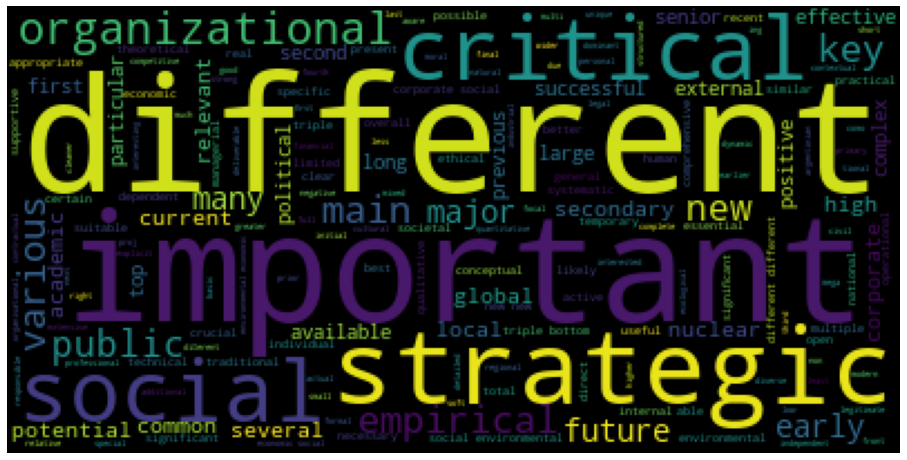

Árvore de adjetivos


In [29]:
plot_wc(WordCloud(stopwords=stop_words, min_word_length=3).generate(' '.join(text_pos_['ADJ'])))
print('Árvore de adjetivos')

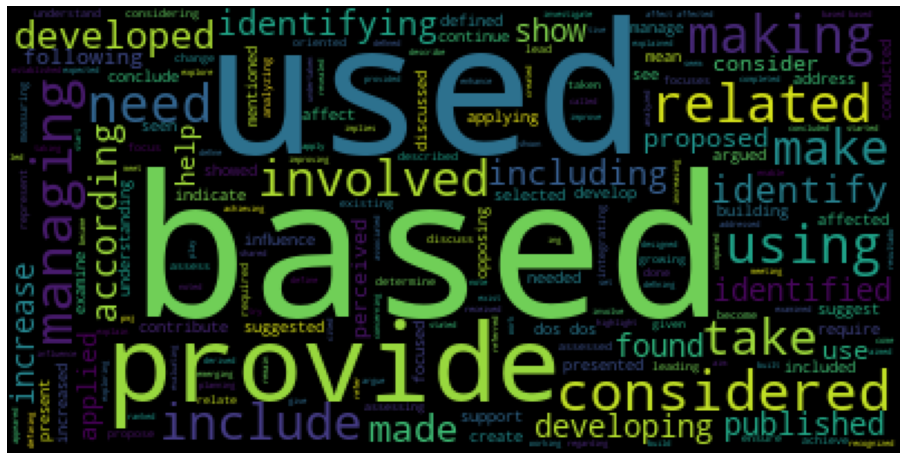

Árvore de verbos


In [30]:
plot_wc(WordCloud(stopwords=stop_words, min_word_length=3).generate(' '.join(text_pos_['VERB'])))
print('Árvore de verbos')

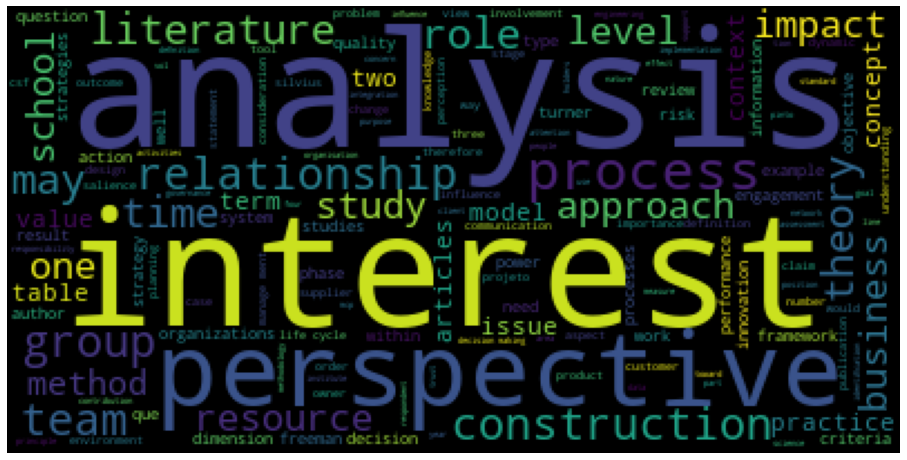

Árvore de outras palavras


In [31]:
plot_wc(WordCloud(stopwords=stop_words, min_word_length=3).generate(' '.join(text_pos_['OTHER'])))
print('Árvore de outras palavras')

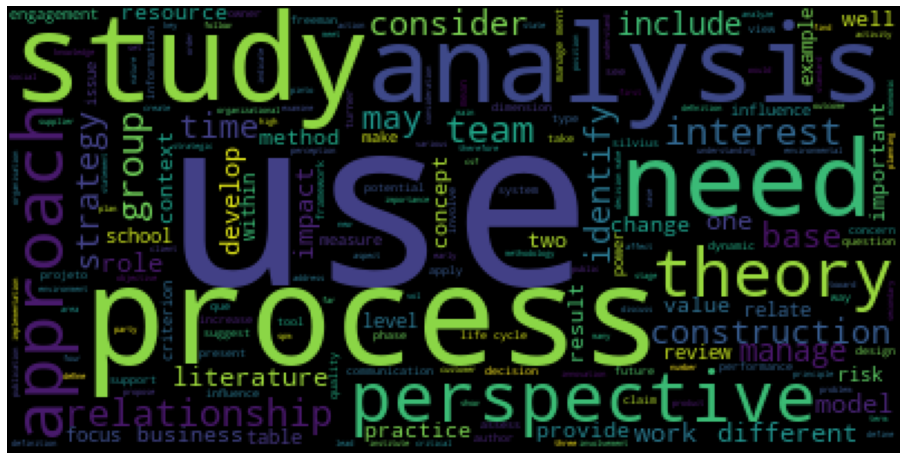

Árvore de palavras lematizadas


In [32]:
plot_wc(WordCloud(stopwords=stop_words, min_word_length=3).generate(' '.join(text_lemma)))
print('Árvore de palavras lematizadas')

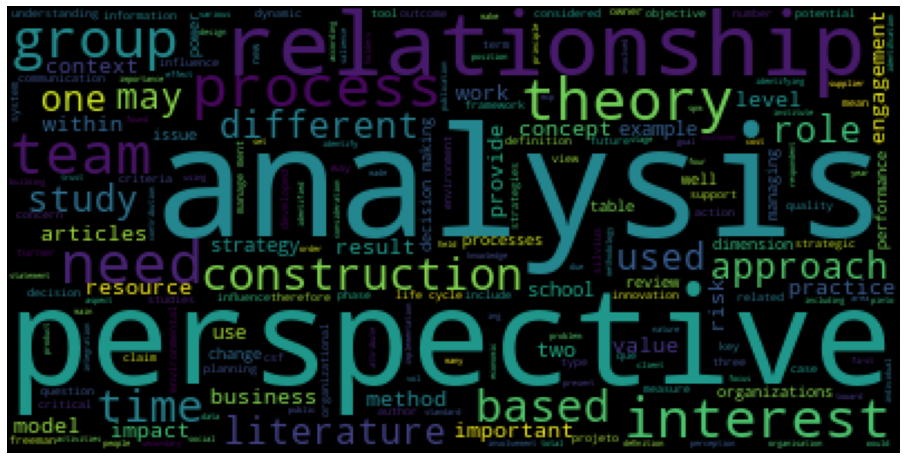

Árvore de palavras originais


In [33]:
plot_wc(WordCloud(stopwords=stop_words, min_word_length=3).generate(text.lower()))
print('Árvore de palavras originais')